Single comments are notes to self, double comments are usage notes

In [1]:
## notebook formatting and loading settings, imports - keep same

%matplotlib inline
%reload_ext autoreload
%autoreload 2

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.interpolate import interp1d # take out if no more
from IPython.display import display, HTML
import math
from datetime import datetime
import os, sys

sys.path.append('../src')
import scaredyrattools as sr

In [2]:
## Be sure to put r before the path
## Easiest to go to correct folder, then copy/paste its path

# just change week number every time? i think?
# need to modify for easy use on non-unix: can I find a module to do this?
inpath = '/Users/liannj/Documents/Anna/FCPracticeData/Week0/1Habituation'

## Make sure the folder exists already. The file does not need to exist; it will be created.
outpath = '/Users/liannj/Documents/Anna/FCPracticeData/DataOutput'

# Future: attempting to loop through all files in a folder. Suuuuper tbd.
filename = 'Raw data-eCB Fear Conditioning Spring 2018-Trial     2.xlsx' ## include .xlsx

# TRYING THIS BECAUSE THEY'RE ALL THE SAME
sheetlist = ['Track-Arena 1-Subject 1', 'Track-Arena 2-Subject 1', 
             'Track-Arena 3-Subject 1', 'Track-Arena 4-Subject 1']

Raw data-eCB Fear Conditioning Spring 2018-Trial     2.xlsx Track-Arena 1-Subject 1 is PF1 in Context A
Raw data-eCB Fear Conditioning Spring 2018-Trial     2.xlsx Track-Arena 2-Subject 1 is PF2 in Context A
Raw data-eCB Fear Conditioning Spring 2018-Trial     2.xlsx Track-Arena 3-Subject 1 is PF3 in Context A
Raw data-eCB Fear Conditioning Spring 2018-Trial     2.xlsx Track-Arena 4-Subject 1 is PF4 in Context A


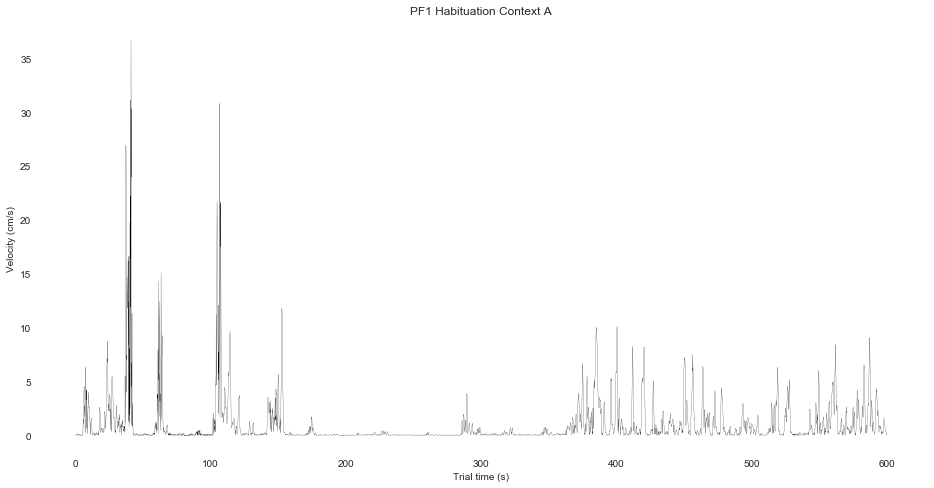

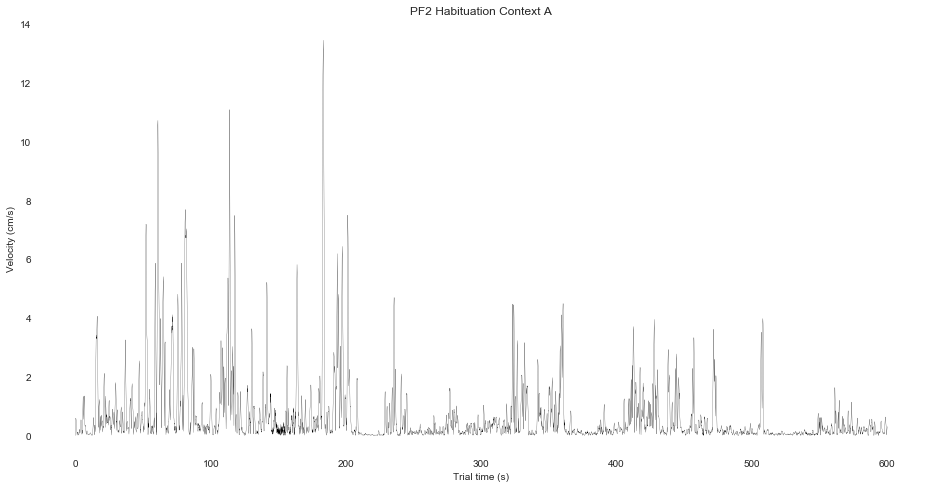

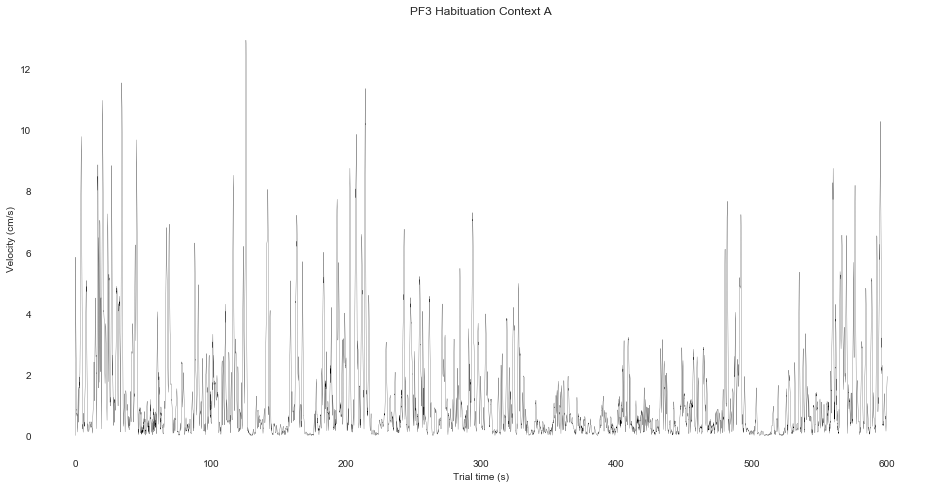

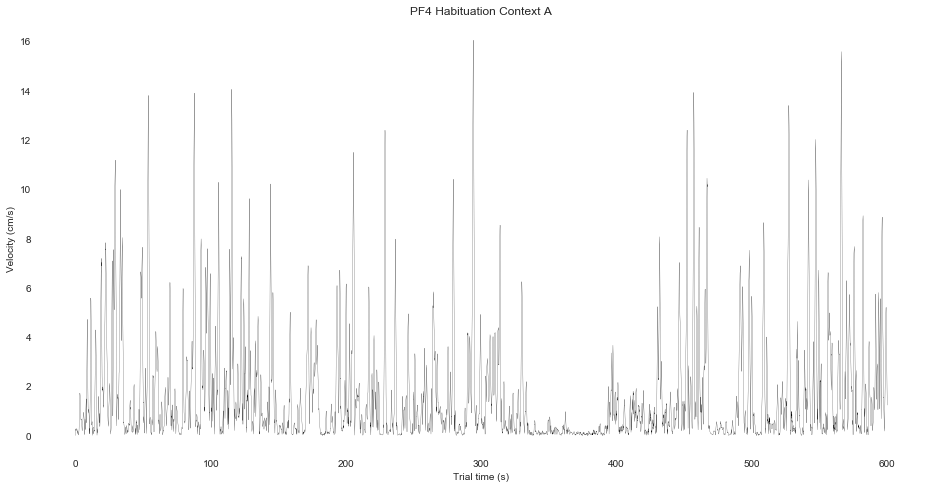

In [3]:
for sheet in sheetlist:
    ID,ctx,starttime,data = sr.animal_read(inpath, filename, sheet)
    
    i = datetime.strptime(starttime, '%m/%d/%Y %H:%M:%S.%f')
    i = datetime.strftime(i,'%y%m%d-%I%p')
    vels = data['Velocity']
    
    med = round(vels.median(),3)
    mean = round(vels.mean(),3)
    std = round(vels.std(),3)
    
    df = pd.DataFrame([[ID, ctx, mean, med, std]],index=None)
    habitOutfile = outpath + '/habituation-data-' + ID + '-' + i + '.csv'
    df.to_csv(habitOutfile)
    
    plt.style.use('seaborn-white')
    plt.figure(figsize=(16,8),facecolor='white',edgecolor='white')
    
    # Plots main velocity
    plt.plot(vels,color='k',linewidth=0.2)
    
    # Plots smoothed velocity
    #f = interp1d(vels.index.values, vels.iloc[:,0])
    #xnew = np.arange(0, 600, 5)
    #ynew = f(xnew)
    #plt.plot(xnew, ynew,'r--')

    sns.despine(left=True, bottom=True, right=True)
    plt.title(ID + " Habituation " + ctx)
    plt.ylabel('Velocity (cm/s)')
    plt.xlabel('Trial time (s)')

    fname = outpath + '/Plots/habituation-plot-' + ID + '-' + i
    plt.savefig(fname, dpi=300)

In [4]:
# current test cell for freezing

nvels = len(vels)
fvels = []
for vel in vels:
    if vel < 1:
        fvels.append(vel)

nfvels = len(fvels)
print(nvels)
print(nfvels)
print(nfvels/nvels * 100)

8993
5050
56.154787056599574
